In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
df=pd.read_csv("Telco_Customer_Churn.csv")

In [5]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges'])


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [9]:
df.shape

(7032, 21)

In [10]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [11]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [12]:
df['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [13]:
df['Churn'].dtype

dtype('int64')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [15]:
df=df.drop(columns=['customerID'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [17]:
cat_cols=df.select_dtypes(include="object").columns
cat_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [18]:
#saparating the binary columns from the entire table of dataset#
binary_cols = [
    'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines'
]

In [19]:
#maping binary columns to 1/0 numerical columns so that ML model will understand#
for col in binary_cols:
    df[col]=df[col].map({'Yes':1,'No':0})

In [20]:
df[binary_cols].head()

,Partner,Dependents,PhoneService,PaperlessBilling,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,1,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,NaN
1,0,0,1,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,0,1,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1.0,0.0,1.0,1.0,0.0,0.0,NaN
4,0,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df[binary_cols]=df[binary_cols].fillna(0)

In [22]:
df[binary_cols].isna().sum()

Partner             0
Dependents          0
PhoneService        0
PaperlessBilling    0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
MultipleLines       0
dtype: int64

In [23]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0.0,DSL,0.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0.0,DSL,1.0,0.0,1.0,0.0,0.0,0.0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0.0,DSL,1.0,1.0,0.0,0.0,0.0,0.0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0.0,DSL,1.0,0.0,1.0,1.0,0.0,0.0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0.0,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,Month-to-month,1,Electronic check,70.70,151.65,1


In [24]:
df[binary_cols].head()

,Partner,Dependents,PhoneService,PaperlessBilling,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,1,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,0,1,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,0,1,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0,0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
#separating the columns with multiple categories which are more than 2
multi_cat_cols=['InternetService','Contract','PaymentMethod','gender']
multi_cat_cols

['InternetService', 'Contract', 'PaymentMethod', 'gender']

In [26]:
df=pd.get_dummies(df,columns=multi_cat_cols,drop_first=True)

In [27]:
df.shape

(7032, 24)

In [28]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male
0,0,1,0,1,0,0.0,0.0,1.0,0.0,0.0,...,29.85,0,False,False,False,False,False,True,False,False
1,0,0,0,34,1,0.0,1.0,0.0,1.0,0.0,...,1889.50,0,False,False,True,False,False,False,True,True
2,0,0,0,2,1,0.0,1.0,1.0,0.0,0.0,...,108.15,1,False,False,False,False,False,False,True,True
3,0,0,0,45,0,0.0,1.0,0.0,1.0,1.0,...,1840.75,0,False,False,True,False,False,False,False,True
4,0,0,0,2,1,0.0,0.0,0.0,0.0,0.0,...,151.65,1,True,False,False,False,False,True,False,False


In [29]:
df = df.astype(int)

In [30]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male
0,0,1,0,1,0,0,0,1,0,0,...,29,0,0,0,0,0,0,1,0,0
1,0,0,0,34,1,0,1,0,1,0,...,1889,0,0,0,1,0,0,0,1,1
2,0,0,0,2,1,0,1,1,0,0,...,108,1,0,0,0,0,0,0,1,1
3,0,0,0,45,0,0,1,0,1,1,...,1840,0,0,0,1,0,0,0,0,1
4,0,0,0,2,1,0,0,0,0,0,...,151,1,1,0,0,0,0,1,0,0


In [31]:
df.dtypes

SeniorCitizen                            int32
Partner                                  int32
Dependents                               int32
tenure                                   int32
PhoneService                             int32
MultipleLines                            int32
OnlineSecurity                           int32
OnlineBackup                             int32
DeviceProtection                         int32
TechSupport                              int32
StreamingTV                              int32
StreamingMovies                          int32
PaperlessBilling                         int32
MonthlyCharges                           int32
TotalCharges                             int32
Churn                                    int32
InternetService_Fiber optic              int32
InternetService_No                       int32
Contract_One year                        int32
Contract_Two year                        int32
PaymentMethod_Credit card (automatic)    int32
PaymentMethod

In [32]:
num_cols=['tenure','MonthlyCharges','TotalCharges']
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [33]:
scaler=StandardScaler()
df[num_cols]=scaler.fit_transform(df[num_cols])

In [34]:
df[num_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7.032000e+03,7.032000e+03,7.032000e+03
mean,-1.126643e-16,2.930281e-17,1.490402e-17
std,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.280248e+00,-1.539974e+00,-9.992161e-01
25%,-9.542963e-01,-9.749373e-01,-8.302411e-01
50%,-1.394171e-01,1.883740e-01,-3.908178e-01
75%,9.199259e-01,8.198859e-01,6.668202e-01
max,1.612573e+00,1.783772e+00,2.824119e+00


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int32  
 1   Partner                                7032 non-null   int32  
 2   Dependents                             7032 non-null   int32  
 3   tenure                                 7032 non-null   float64
 4   PhoneService                           7032 non-null   int32  
 5   MultipleLines                          7032 non-null   int32  
 6   OnlineSecurity                         7032 non-null   int32  
 7   OnlineBackup                           7032 non-null   int32  
 8   DeviceProtection                       7032 non-null   int32  
 9   TechSupport                            7032 non-null   int32  
 10  StreamingTV                            7032 non-null   int32  
 11  Streaming

In [36]:
x=df.drop('Churn',axis=1)
y=df['Churn']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
x_train.shape,x_test.shape

((5625, 23), (1407, 23))

In [37]:
#importing the logistic regression model
from sklearn.linear_model import LogisticRegression

In [38]:
#creating model in log_reg variable with 1000 maximum iterations
log_reg=LogisticRegression(max_iter=1000)

In [39]:
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [40]:
y_pred=log_reg.predict(x_test)

In [41]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[918, 115],
       [162, 212]], dtype=int64)

In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [43]:
#importing the decision tree model to improve the model training for better predictions
from sklearn.tree import DecisionTreeClassifier

In [44]:
#creating the DT model
dt = DecisionTreeClassifier(max_depth=6,random_state=42)

In [45]:
#training the model using the data that is separated for training
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [46]:
#making the predictions using the test data
y_pred_dt = dt.predict(x_test)

In [47]:
confusion_matrix(y_test, y_pred_dt)

array([[903, 130],
       [174, 200]], dtype=int64)

In [48]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1033
           1       0.61      0.53      0.57       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.78      0.78      1407



In [49]:
#importing the RFC
from sklearn.ensemble import RandomForestClassifier

In [50]:
#creating the model
rf = RandomForestClassifier(n_estimators=200,max_depth=8,random_state=42,class_weight='balanced')

In [51]:
#training the model using trainning data
rf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=200,
                       random_state=42)

In [52]:
#prediction
y_pred_rf = rf.predict(x_test)

In [53]:
y_pred_rf = rf.predict(x_test)

In [54]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1033
           1       0.52      0.78      0.62       374

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.76      1407



In [55]:
# Create a DataFrame of feature importance
feature_importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': rf.feature_importances_})

# Sort by importance (descending)
feature_importance = feature_importance.sort_values(by='Importance',ascending=False)

feature_importance.head(10)


,Feature,Importance
3,tenure,0.191531
18,Contract_Two year,0.130556
14,TotalCharges,0.127434
15,InternetService_Fiber optic,0.097977
13,MonthlyCharges,0.093428
20,PaymentMethod_Electronic check,0.071536
16,InternetService_No,0.054752
17,Contract_One year,0.052792
6,OnlineSecurity,0.023981
12,PaperlessBilling,0.020715


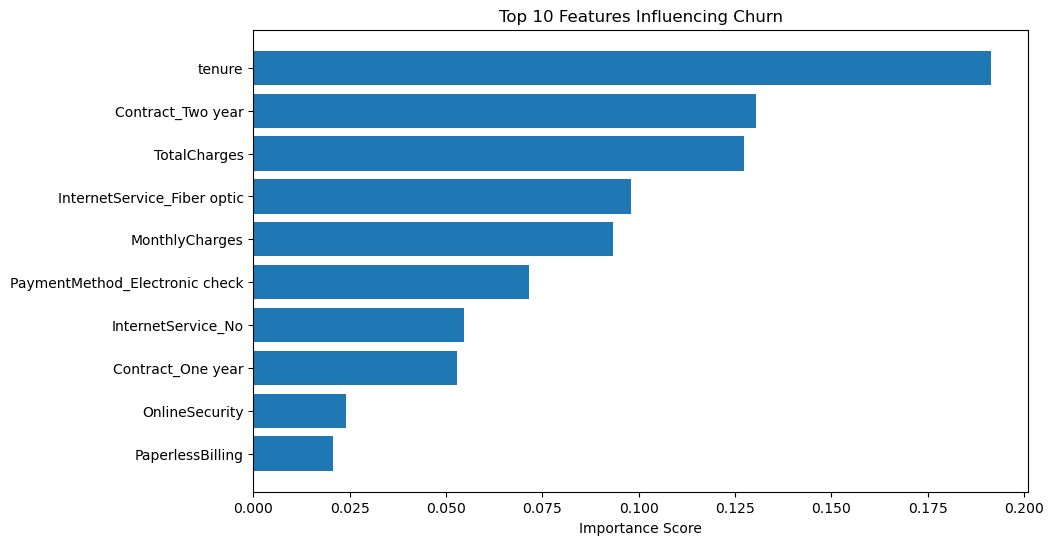

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(
    feature_importance['Feature'].head(10),
    feature_importance['Importance'].head(10)
)
plt.gca().invert_yaxis()
plt.title('Top 10 Features Influencing Churn')
plt.xlabel('Importance Score')
plt.show()


In [57]:
# Final model selected for churn prediction
final_model = rf